In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [13]:
os.listdir("../out/time-depth-models/")

['tdm_core_1150_d18O_bulk_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1100_d18O_conventional.csv',
 'tdm_core_1150_aragonite_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_LR04stack_out.csv',
 'tdm_core_1150_d18O_bulk_split_1_LR04stack_out.csv',
 'tdm_core_1150_combined_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1100_d18O_LR04stack_dtw.csv',
 'tdm_core_1150_d18O_LR04stack_out.csv']

In [43]:
df1 = pd.read_csv("../data/LR04stack.csv")

In [44]:
df1.columns

Index(['time', 'd18O'], dtype='object')

In [46]:
df1 = df1[df1['time'] <= 285.0]

In [47]:
df1.tail()

,time,d18O
281,281.0,4.21
282,282.0,3.98
283,283.0,3.87
284,284.0,3.86
285,285.0,3.84


In [76]:
tdm = pd.read_csv("../out/time-depth-models/tdm_core_1150_combined_core_1100_conventional_agemodel_out.csv")

In [77]:
tdm.tail()

,depth_m,time_combined
285,14.26,111.448220
286,14.31,112.021046
287,14.36,112.021046
288,14.41,112.021046
289,14.46,112.021046


In [84]:
data = pd.read_excel("../out/data_1150.xlsx")

In [87]:
data.drop('age_ka_dtw', axis=1, inplace=True)

In [89]:
data.columns

Index(['depth_m', 'aragonite_%', 'low-magnesium-calcite_%',
       'high-magnesium-calcite_%', 'pore-water_%',
       'organic-carbon_thermo-gravimetry_%',
       'total-organic-carbon_thermo-gravimetry_%',
       'calcium-carbonate_thermo-gravimetry_%', 'total-carbon_Flash-EA1112_%',
       'total-organic-carbon_Flash-EA1112_%', 'total-nitrogen_Flash-EA1112_%',
       'calcium-carbonate_Flash-EA1112_%', 'sieve->500ym_%',
       'sieve-355-500ym_%', 'sieve-250-355ym_%', 'sieve-125-250ym_%',
       'sieve-63-125ym_%', 'sieve-<63ym_%', 'laser-<63ym_%',
       'laser-63-125ym_%', 'laser-125-250ym_%', 'laser-250-500ym_%',
       'laser->500ym_%', 'd18O_pl', 'd13C_pl', 'd13C_bulk', 'd18O_bulk', 'L*',
       'a*', 'b*', 'laser-mean', 'laser-sorting', 'laser-skewness',
       'laser-kurtosis', 'laser-median', 'age_ka/before-present',
       'sedimentation-rates_cm/ka', 'time_dtw_combined'],
      dtype='object')

In [81]:
data['time_dtw_combined'] = data['depth_m'].map(dict(zip(tdm['depth_m'], tdm['time_combined'])))

In [90]:
data = data[['depth_m', 'time_dtw_combined', 'aragonite_%', 'low-magnesium-calcite_%',
       'high-magnesium-calcite_%', 'pore-water_%',
       'organic-carbon_thermo-gravimetry_%',
       'total-organic-carbon_thermo-gravimetry_%',
       'calcium-carbonate_thermo-gravimetry_%', 'total-carbon_Flash-EA1112_%',
       'total-organic-carbon_Flash-EA1112_%', 'total-nitrogen_Flash-EA1112_%',
       'calcium-carbonate_Flash-EA1112_%', 'sieve->500ym_%',
       'sieve-355-500ym_%', 'sieve-250-355ym_%', 'sieve-125-250ym_%',
       'sieve-63-125ym_%', 'sieve-<63ym_%', 'laser-<63ym_%',
       'laser-63-125ym_%', 'laser-125-250ym_%', 'laser-250-500ym_%',
       'laser->500ym_%', 'd18O_pl', 'd13C_pl', 'd13C_bulk', 'd18O_bulk', 'L*',
       'a*', 'b*', 'laser-mean', 'laser-sorting', 'laser-skewness',
       'laser-kurtosis', 'laser-median', 'age_ka/before-present',
       'sedimentation-rates_cm/ka']]

In [91]:
data.to_excel("../out/data_1150.xlsx", index=False)

In [20]:
df = pd.read_excel("../data/Paul_etal_M74-4-1100.xlsx")

In [21]:
tdm_con = pd.read_csv("../out/time-depth-models/tdm_core_1100_d18O_conventional.csv")
tdm_dtw = pd.read_csv("../out/time-depth-models/tdm_core_1100_d18O_LR04stack_dtw.csv")

In [22]:
tdm_con.head(2)

,depth_m,time
0,0.01,0.000000
1,0.06,0.899604


In [23]:
tdm_dtw.head(2)

,depth_m,time
0,0.01,0.0
1,0.06,0.0


In [24]:
df['time_conventional'] = df['depth_m'].map(dict(zip(tdm_con['depth_m'], tdm_con['time'])))
df['time_dtw'] = df['depth_m'].map(dict(zip(tdm_dtw['depth_m'], tdm_dtw['time'])))

In [26]:
df = df.drop(['age_ka'], axis=1)

In [29]:
df = df[['depth_m','time_conventional',
       'time_dtw', 'd13C_pl', 'd18O_pl', 'aragonite_%',
       'low-magnesium-calcite_%', 'high-magnesium-calcite_%',
       'sedimentation-rates_cm/ka', 'd13C_bulk', 'd18O_bulk',
       'sieve-coarse->63ym_%', 'sieve-fine-<=63ym_%', 'L*', 'a*', 'b*',
       'laser-mean', 'laser-sorting', 'laser-skewness', 'laser-kurtosis',
       'laser-sand', 'laser-mud', 'laser-median']]

In [59]:
df.to_excel("../out/data_1100.xlsx", index=False)

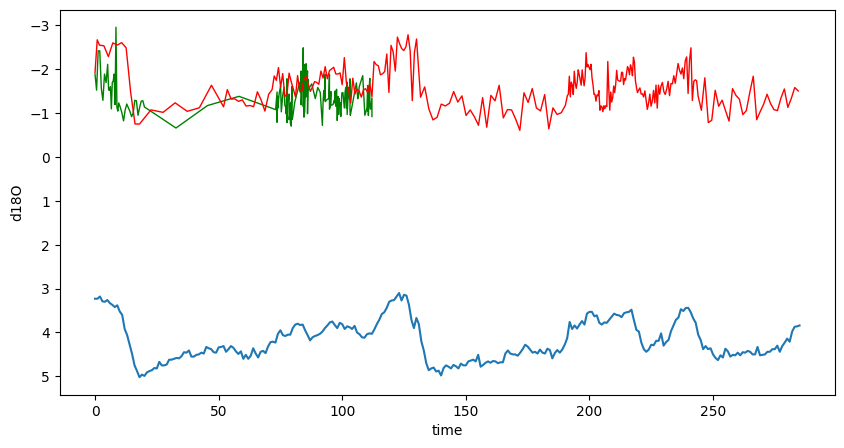

In [93]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,5)
sns.lineplot(ax=ax, x='time', y='d18O', data=df1)
sns.lineplot(ax=ax, x='time_dtw_combined', y='d18O_pl', data=data, estimator=None, color='green', linewidth=1)
sns.lineplot(ax=ax, x='time_conventional', y='d18O_pl', data=df, estimator=None, color='red', linewidth=1)
ax.invert_yaxis()

In [49]:
f.savefig('../out/figures/fig07_1100.eps')

In [21]:
tmp1 = pd.read_csv("../data/core_1150_aragonite.csv", skip_blank_lines=True)

In [22]:
tmp2 = pd.read_csv("../data/core_1150_d18O_pl.csv", skip_blank_lines=True)

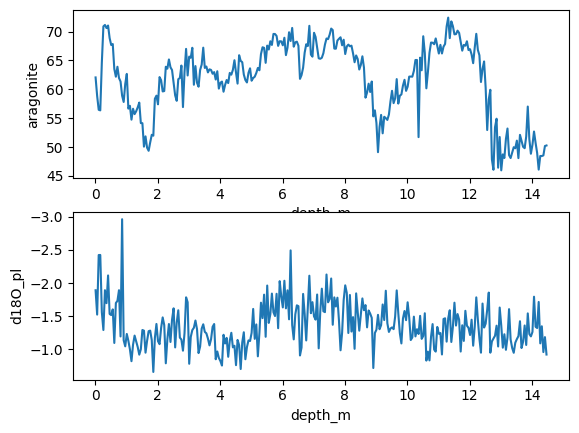

In [23]:
fig, ax = plt.subplots(2, 1)
sns.lineplot(ax=ax[0], x=tmp1['depth_m'], y=tmp1['aragonite'])
sns.lineplot(ax=ax[1], x=tmp2['depth_m'], y=tmp2['d18O_pl'])
ax[1].invert_yaxis()

In [24]:
fig.savefig('../out/tmp.png', dpi=300)